In [ ]:
# prompt: mounting gdrive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

In [1]:
# prompt: loading the pretrained unet model in my drive

import tensorflow as tf

model_path = '/content/drive/MyDrive/Porosity DL Project/unet_microstructure_segmentation.h5' # Replace with the actual path

model = tf.keras.models.load_model(model_path)


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import os

# ------------------- Set Paths -------------------
input_folder = "/content/drive/MyDrive/Porosity DL/Cropped Binary"  # Folder containing binary images

# List to store results
results = []

# Loop through images
for filename in os.listdir(input_folder):
    if filename.endswith(".tif"):
        image_path = os.path.join(input_folder, filename)

        # Load binary image (0 = black, 255 = white)
        binary_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Get image dimensions
        height, width = binary_img.shape
        center = (width // 2, height // 2)
        radius = min(width, height) // 2  # Assuming the circle fits inside the square

        # Create a circular mask
        mask = np.zeros_like(binary_img)
        cv2.circle(mask, center, radius, 255, -1)  # Draw a white circle on a black background

        # Apply the mask to keep only circular region
        circular_region = cv2.bitwise_and(binary_img, mask)

        # Count total pixels inside the circle (both black and white)
        total_pixels_in_circle = np.count_nonzero(mask == 255)

        # Count black pixels (pores) inside the circle
        black_pixels_in_circle = np.count_nonzero((circular_region == 0) & (mask == 255))

        # Calculate porosity percentage
        porosity = (black_pixels_in_circle / total_pixels_in_circle) * 100

        # Store result
        results.append(porosity)


# Compute statistics
if results:
    # Compute statistics
    count_images = len(results)
    min_porosity = min(results)
    max_porosity = max(results)
    mean_porosity = sum(results) / count_images

    # Print final statistics
    print(f"Porosity Statistics:")
    print(f" Total Images: {count_images}")
    print(f" Min Porosity: {min_porosity:.2f}%")
    print(f" Max Porosity: {max_porosity:.2f}%")
    print(f" Mean Porosity: {mean_porosity:.2f}%")
else:
    print("No .tif or .tiff images found in the input folder.")
# Print final statistics
print(f"Porosity Statistics:")
print(f" Total Images: {count_images}")
print(f" Min Porosity: {min_porosity:.2f}%")
print(f" Max Porosity: {max_porosity:.2f}%")
print(f" Mean Porosity: {mean_porosity:.2f}%")

Porosity Statistics:
 Total Images: 1700
 Min Porosity: 0.51%
 Max Porosity: 9.08%
 Mean Porosity: 1.61%
Porosity Statistics:
 Total Images: 1700
 Min Porosity: 0.51%
 Max Porosity: 9.08%
 Mean Porosity: 1.61%


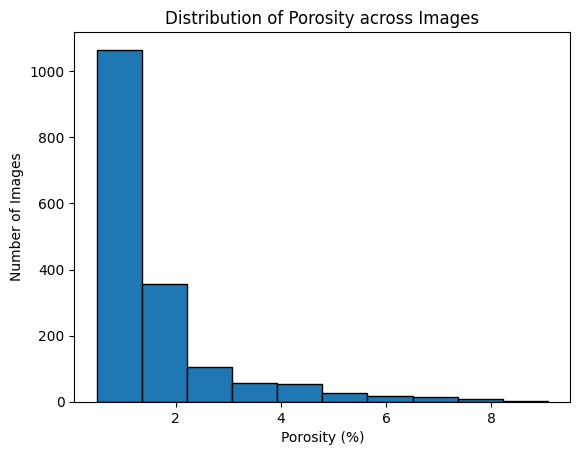

In [ ]:
# prompt: can i get distribution of porosity accross image

import matplotlib.pyplot as plt

# Assuming 'results' list contains the porosity values from the previous code

# Create a histogram of the porosity distribution
plt.hist(results, bins=10, edgecolor='black')  # Adjust 'bins' for desired granularity
plt.xlabel('Porosity (%)')
plt.ylabel('Number of Images')
plt.title('Distribution of Porosity across Images')
plt.show()


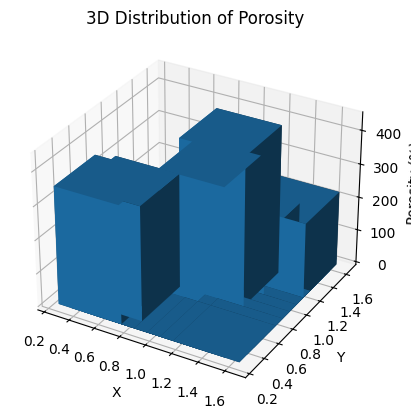

In [ ]:
# prompt: 3d DISTRIBUTION

import matplotlib.pyplot as plt

# prompt: 3d DISTRIBUTION

import matplotlib.pyplot as plt

# Assuming 'results' list contains the porosity values from the previous code

# Create a 3D histogram of the porosity distribution (example with dummy data)
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming 'results' has length 1700
num_samples = len(results)  # Get the actual length of 'results'

# Create x and y coordinates based on the number of samples
# Adjust these based on your image dimensions and how you want to map them
x = np.linspace(0, 1, num_samples)  # Example x-values
y = np.linspace(0, 1, num_samples)  # Example y-values
z = results  # Your porosity values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=10, weights=z)

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Porosity (%)')
ax.set_title('3D Distribution of Porosity')

plt.show()
